# Klasyfikacja i regresja przy pomocy metod SVM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import itertools
from sklearn import svm, datasets
from matplotlib import style
style.use("ggplot")

Biblioteka ułatwiająca rysowanie granic decyzyjnych ( *pip install mlxtend* ):

In [3]:
from mlxtend.plotting import plot_decision_regions

In [4]:
def plot_hyperplane(X, y, clf):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 10)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.show()

### Prosty przykład klasyfikacji 

In [ ]:
X = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
y = np.array([0,1,0,1,0,1])

In [5]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
#plot_hyperplane(X, y, clf)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

### Klasyfikacja danych z przykładowego zbioru

In [16]:
df = pd.read_csv('data/dataset1.csv')
X = df[['f1','f2']].as_matrix()
y = df['l'].as_matrix()

In [17]:
#clf = svm.SVC(kernel='linear', C=1.0)
#clf = svm.SVC(kernel='poly', degree=3, C=1.0)
clf = svm.SVC(kernel='rbf', gamma=99.7, C=1.0)
clf.fit(X,y)
# TODO: Podzielić na zbiór treningowy i testowy
clf.score(X,y)

1.0

Bardzo duży czas plottingu dla większych danych, spróbować z innym zbiorem danych

In [ ]:
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

#plt.xlabel(X.columns[0], size=14)
#plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

### Przykład zbioru nieseparowalnego liniowo

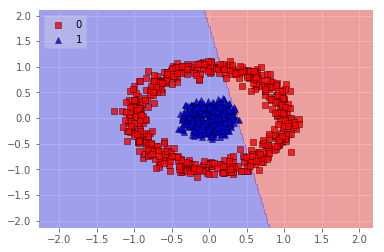

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

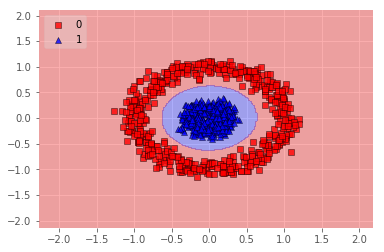

In [9]:
clf = svm.SVC(kernel='rbf', C=1.0)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

### Porównanie różnych typów kerneli
TODO: Poeksperymentować z różnymi wartościami C, gamma i degree.

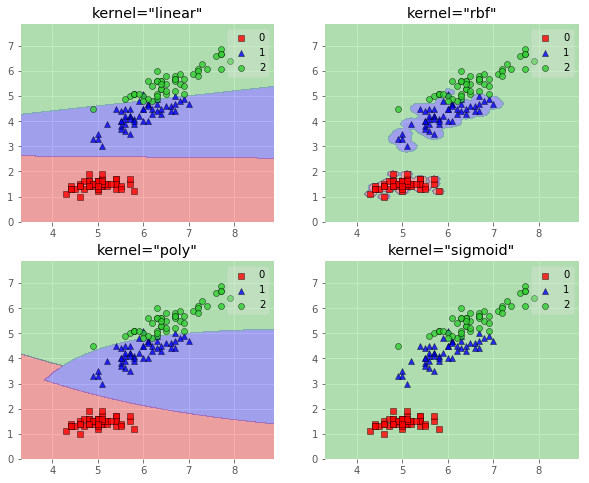

In [5]:
# Initializing Classifiers
C = 1.0
gamma = 99.7
degree = 3
coef0 = 4.5

clf1 = svm.SVC(kernel='linear', C=C)
clf2 = svm.SVC(kernel='rbf', gamma=gamma, C=C)
clf3 = svm.SVC(kernel='poly', degree=degree, coef0=coef0, C=C)
clf4 = svm.SVC(kernel='sigmoid', coef0=coef0, C=C)

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target


gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['kernel="linear"', 'kernel="rbf"', 'kernel="poly"', 'kernel="sigmoid"']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()